# Write a Python program to read ‘rice.tif’ image, count number of rice and display area (also specific range), major axis length, and perimeter.

Total Rice Grains: 77
Average Area: 157.52597402597402
Average Major Axis Length: 28.834813303761667
Average Perimeter: 73.00335669981969


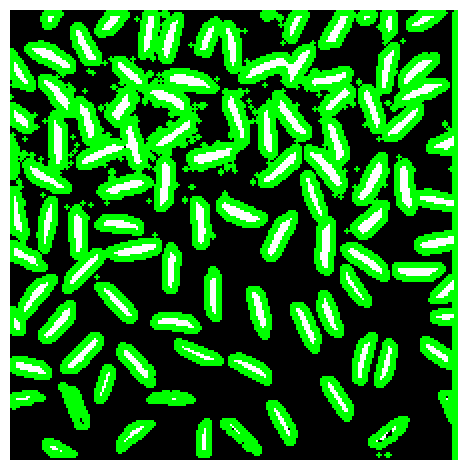

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the rice.tif image in grayscale
image_path = 'rice.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply thresholding to segment the rice grains
_, binary_image = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)

# Find contours of rice grains
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize variables to store rice statistics
total_rice = 0
total_area = 0
total_major_axis_length = 0
total_perimeter = 0

# Iterate through the detected rice grains
for contour in contours:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    if area > 50:  # Filter out small noise contours
        total_rice += 1
        total_area += area
        ellipse = cv2.fitEllipse(contour)
        major_axis_length = max(ellipse[1])
        total_major_axis_length += major_axis_length
        total_perimeter += perimeter

# Calculate average statistics
average_area = total_area / total_rice
average_major_axis_length = total_major_axis_length / total_rice
average_perimeter = total_perimeter / total_rice

# Display results
print("Total Rice Grains:", total_rice)
print("Average Area:", average_area)
print("Average Major Axis Length:", average_major_axis_length)
print("Average Perimeter:", average_perimeter)

# Draw contours on the image
contour_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
plt.imshow(contour_image)
plt.axis('off')
plt.tight_layout()
plt.show()
